In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from Data_Preprocess import DataPreprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import hdbscan
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans




'c:\\Users\\gabi1\\git\\Project'

### Data prepocessing

In [2]:
preprocessor = DataPreprocessing()
script_dir = os.path.dirname("4.0 UMAP+Kmeans_DBSCAN_HDBSCAN.ipynb")
data_path = os.path.join(script_dir,'..','..','Data', 'RawData.csv')
data = pd.read_csv(data_path,encoding='latin1').dropna()
data

   Unnamed: 0    XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5  \
0           1  0.271033  3649.739415  4451.320791  9.223142  32.392900   
1           2  0.270826  3653.341885  4488.640140  9.211980  32.501953   
2           3  0.270474  3688.113265  4432.832766  9.235690  32.402838   
3           4  0.272127  3651.680041  4459.268940  9.192009  31.876790   
4           5  0.270939  3636.329271  4460.409756  9.277992  32.424754   

      XMEAS6       XMEAS7     XMEAS8      XMEAS9  ...       XMV1       XMV2  \
0  47.559754  2798.975799  64.995825  122.898796  ...  62.806984  53.286709   
1  47.374855  2800.296214  65.091251  122.877519  ...  62.819324  53.220324   
2  47.817088  2802.647777  64.812363  122.916165  ...  62.836835  53.211797   
3  47.869249  2803.693084  64.205417  122.892493  ...  62.848190  53.186885   
4  47.509322  2804.787223  64.598623  122.890514  ...  62.848341  53.192271   

        XMV3       XMV4       XMV6       XMV7       XMV8      XMV10  \
0  26.662

### Splitting the data

In [3]:
train_validation1, test1 = train_test_split(data, train_size=0.7, test_size=0.3, random_state=60)
train1, validation1 = train_test_split(train_validation1,train_size=0.50, test_size=0.50, random_state=60)

### Dimensionality Reduction

In [4]:
Norm =MinMaxScaler()
train_data_normalized=pd.DataFrame(Norm.fit_transform(train1))
train_data_normalized

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.355958,0.328726,0.408750,0.207064,0.490620,0.845466,0.797197,0.591759,0.582244,0.357315,...,0.282689,0.186882,0.239253,0.442807,0.270104,0.312699,0.586708,0.802192,0.220639,0.0
1,0.356461,0.324748,0.331923,0.209968,0.482524,0.793793,0.802452,0.591172,0.439225,0.470139,...,0.257129,0.194986,0.239734,0.449300,0.266481,0.308842,0.575837,0.798846,0.258838,0.0
2,0.939165,0.514701,0.626472,0.289152,0.439571,0.874489,0.859111,0.459418,0.264201,0.258824,...,0.482457,0.261674,0.385043,0.369181,0.002788,0.502196,0.821106,0.875201,0.209401,0.0
3,0.143791,0.395694,0.481297,0.315416,0.558091,0.831131,0.834982,0.597232,0.489475,0.786263,...,0.415332,0.271859,0.290831,0.534746,0.490836,0.239708,0.477426,0.855604,0.283583,0.0
4,0.442433,0.344934,0.484010,0.219479,0.430941,0.864238,0.767037,0.593241,0.433918,0.468604,...,0.337706,0.166890,0.252732,0.439919,0.265409,0.321680,0.580468,0.805971,0.193795,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,0.298140,0.342642,0.411370,0.215847,0.381709,0.833219,0.782444,0.594326,0.445553,0.301980,...,0.326245,0.174080,0.250862,0.472795,0.242606,0.322343,0.586928,0.808195,0.308949,0.0
694,0.563600,0.480092,0.263863,0.321343,0.337235,0.669470,0.644931,0.372241,0.841499,0.533924,...,0.149403,0.283676,0.359569,0.380929,0.059550,0.144638,0.260809,0.886227,0.203143,0.0
695,0.153846,0.388949,0.524246,0.435685,0.578571,0.821739,0.817203,0.595837,0.465321,0.263315,...,0.348444,0.309588,0.289374,0.577012,0.482787,0.235940,0.498971,0.818301,0.002359,0.0
696,0.275013,0.336868,0.468397,0.190055,0.524084,0.813964,0.801273,0.597924,0.605717,0.487311,...,0.306706,0.179245,0.247836,0.469954,0.256132,0.324797,0.574233,0.798904,0.394000,0.0


### RD: KernelPCA

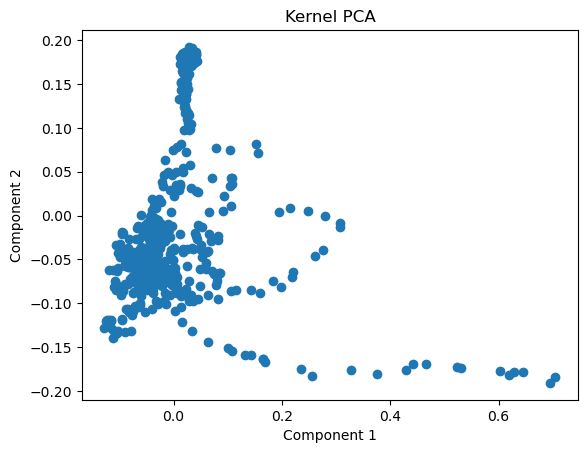

In [6]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(train_data_normalized)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Kernel PCA')
plt.show()

### Clustering 1: DBSCAN    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(698,)
(698, 2)


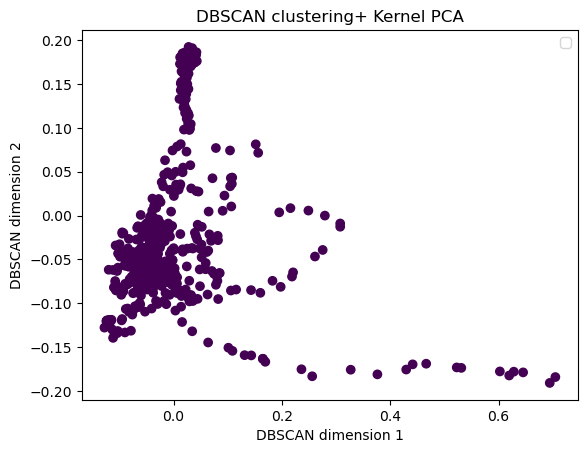

In [7]:
# Clustering 1: DBCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)# Best combination achieved. It's fun to play with them
clusters = dbscan.fit_predict(X_kpca)
print(clusters.shape)
print(X_kpca.shape)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=clusters, cmap='viridis')

plt.title('DBSCAN clustering+ Kernel PCA')
plt.xlabel("DBSCAN dimension 1")
plt.ylabel("DBSCAN dimension 2")
plt.legend()
plt.show()

Cluster evaluation

In [ ]:
score = silhouette_score(X_kpca,clusters,metric='euclidean')
print(score)

In [ ]:
db_index = davies_bouldin_score(X_kpca,clusters)
db_index

### Clusteing 2: HDBSCAN

In [ ]:
# Clustering 2
HD = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2)
cluster_labels = HD.fit_predict(X_kpca)

print(cluster_labels.shape)
print(X_kpca.shape)


plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('HDBSCAN clustering+ Kernel PCA')
plt.xlabel("HDBSCAN dimension 1")
plt.ylabel("HDBSCAN dimension 2")
plt.legend()
plt.show()

### Cluster evaluation

In [11]:
# Silhouette Coefficient: The best value is 1 and the worst value is -1.
score = silhouette_score(X_kpca,cluster_labels,metric='euclidean')
print(score)

0.31860188342615103


In [12]:
#Davies - Bouldin Index: The minimum score is zero, with lower values indicating better clustering.
db_index = davies_bouldin_score(X_kpca,cluster_labels)
db_index

1.8248441373899642

c:\Users\gabi1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


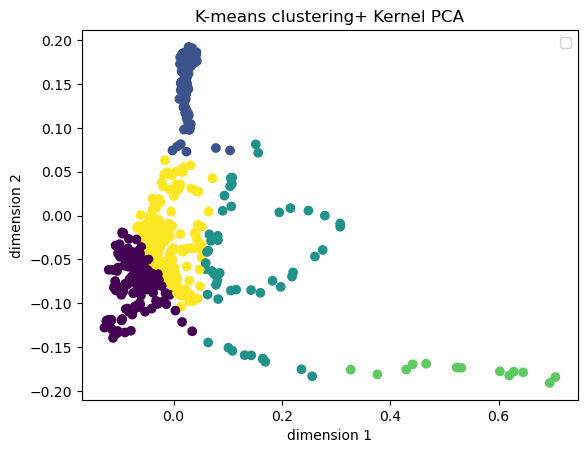

In [10]:
# Clustering 3
# Instantiate KMeans object
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# Fit and predict clusters
y_kmeans = kmeans.fit_predict(X_kpca)
(y_kmeans ==1).sum()

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_kmeans, cmap='viridis')

plt.title('K-means clustering+ Kernel PCA')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.legend()
plt.show()

In [17]:
# Silhouette Coefficient: The best value is 1 and the worst value is -1.
score = silhouette_score(X_kpca,y_kmeans,metric='euclidean')
print(score)

0.49628299290113925


In [18]:
#Davies - Bouldin Index: The minimum score is zero, with lower values indicating better clustering.
db_index = davies_bouldin_score(X_kpca,y_kmeans)
db_index

0.717294239420946